In [8]:
# Import libraries and plotting functions
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
# Set default renderer for Plotly (optional)
pio.renderers.default = 'notebook_connected'

## Dataset Collection Configuration
### Config for df_without_LULUCF
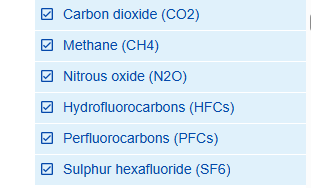
### Config for df_from_LULUCF
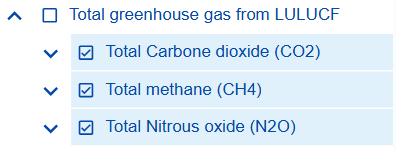
### df_with_LULUCF is produced from transforming df_without_LULUCF and df_from_LULUCF 
### Config for df_sectors
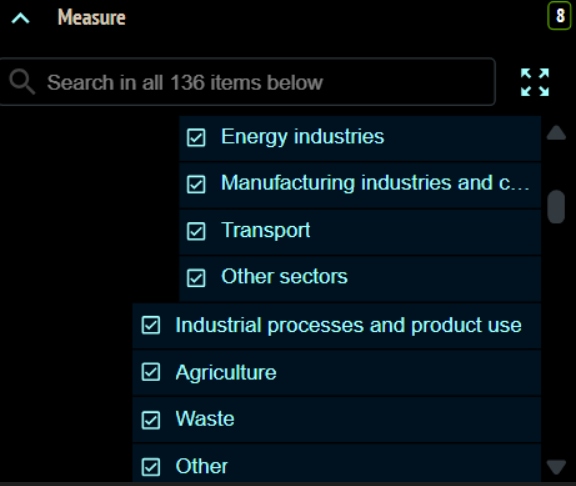
### Config for df_nature
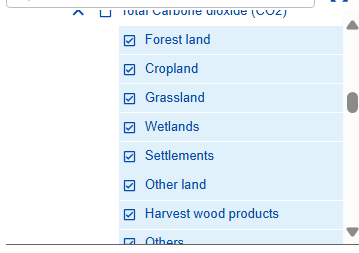
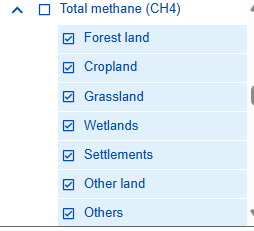
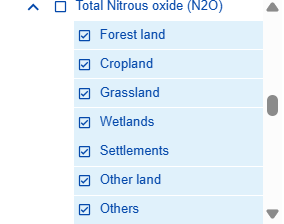

In [ ]:
# we need df without LULUCF, from LULUCF, with LULUCF, sectors (without LULUCF), nature sources (from LULUCF))
df_without_LULUCF = pd.read_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasWithoutLULUCF.csv')
df_from_LULUCF = pd.read_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasFromLULUCF.csv')
df_with_LULUCF = pd.read_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasWithLULUCF.csv')
df_sectors = pd.read_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasBySectors.csv')
# focus on the 'MEASURE' column, discard '_SECTOR' 
df_sectors['MEASURE'] = df_sectors['MEASURE'].str.replace('_SECTOR', '', regex=False)
# focus on the 'Measure' column, replace 'Other sectors' with 'Other'
df_sectors['Measure'] = df_sectors['Measure'].str.replace('Other sectors', 'Other', regex=False)
df_nature_sources = pd.read_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasByNatureSources.csv')
dfs = {
    'df_without_LULUCF': df_without_LULUCF,
    'df_from_LULUCF': df_from_LULUCF,
    'df_with_LULUCF': df_with_LULUCF,
    'df_sectors': df_sectors,
    'df_nature_sources': df_nature_sources}
# Iterate through the dfs dictionary to clean each DataFrame
    # only include countries instead of regions ['EU27', 'EU', 'EU27_2020', 'EU28']
    # multiply 'OBS_VALUE' by number of 'UNIT_MULT' to get the actual value. for example, if 'UNIT_MULT' is 3, then 'OBS_VALUE' should be multiplied by 10^3
for key, df in dfs.items():
    if 'REF_AREA' in df.columns:
        df = df[~df['REF_AREA'].isin(['EU27', 'EU', 'EU27_2020', 'EU28'])]
    if 'UNIT_MULT' in df.columns:
        df['OBS_VALUE'] = df['OBS_VALUE'] * (10 ** df['UNIT_MULT'])
    dfs[key] = df
#create df_with_LULUCF by combining df_without_LULUCF and df_from_LULUCF, 
#df_with_LULUCF = pd.concat([df_without_LULUCF, df_from_LULUCF], ignore_index=True)
#firstly, focus on the 'MEASURE' column, discard '_LULUCF'
#df_with_LULUCF['MEASURE'] = df_with_LULUCF['MEASURE'].str.replace('_LULUCF', '', regex=False)
#Group by 'REF_AREA', 'TIME_PERIOD', 'MEASURE' and sum 'OBS_VALUE'
#df_with_LULUCF = df_with_LULUCF.groupby(['REF_AREA', 'TIME_PERIOD', 'MEASURE'], as_index=False)['OBS_VALUE'].sum()
# save df_with_LULUCF to GreenHouseGasWithLULUCF.csv
#df_with_LULUCF.to_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasWithLULUCF.csv', index=False)
#dfs['df_with_LULUCF'] = df_with_LULUCF

# HERE IS THE UPDATE PART TO OVERWRITE THE DATAF TO SAME FILES
# ONLY USE 3 COLUMNS: 'REF_AREA', 'TIME_PERIOD', 'MEASURE', 'OBS_VALUE'. the exception is df_nature_sources, which should only have 4 columns ['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE', 'MEASURE', 'GHS Type']
# Rename 'MEASURE' to 'GHS Type' and 'OBS_VALUE' to 'Gas Output' and 'REF_AREA' to 'Country' and 'TIME_PERIOD' to 'Year'
# Save the updated DataFrames back to CSV files with renamed columns, but do NOT overwrite the DataFrames in dfs
for key, df in dfs.items():
    if 'GHS_TYPE' in df.columns:
        df_to_save = df[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE', "MEASURE", 'GHS_TYPE']].rename(
            columns={'REF_AREA': 'Country', 'TIME_PERIOD': 'Year', 'OBS_VALUE': 'Gas Output', 'MEASURE': 'Nature Source', 'GHS_TYPE': 'GHS Type'}
        )
        df_to_save = df_to_save[['Country', 'Year', 'Gas Output', 'Nature Source', 'GHS Type']]
    else:
        df_to_save = df[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE', 'MEASURE']].rename(
            columns={'REF_AREA': 'Country', 'TIME_PERIOD': 'Year', 'OBS_VALUE': 'Gas Output', 'MEASURE': 'GHS Type'}
        )
        df_to_save = df_to_save[['Country', 'Year', 'Gas Output', 'GHS Type']]
    # Save to CSV
    if key == 'df_without_LULUCF':
        df_to_save.to_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasWithoutLULUCF.csv', index=False)
    elif key == 'df_from_LULUCF':
        df_to_save.to_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasFromLULUCF.csv', index=False)
    elif key == 'df_with_LULUCF':
        df_to_save.to_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasWithLULUCF.csv', index=False)
    elif key == 'df_sectors':
        df_to_save.to_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasBySectors.csv', index=False)
    elif key == 'df_nature_sources':
        df_to_save.to_csv(r'.\DataSource\GreenHouseGas\GreenHouseGasByNatureSources.csv', index=False)


    

KeyError: 'MEASURE'

In [ ]:
df = dfs.get('df_with_LULUCF', None)

In [ ]:

body = {
    "selected_TIME_PERIOD": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "selected_REF_AREA": ['CHL', 'AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'EST',
   'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA'],
    "selected_MEASURE": ['HFC', 'CH4', 'N2O', 'PFC', 'SF','CH4_LULUCF', 'N2O_LULUCF', 'CO2_LULUCF', 'HFC_LULUCF', 'PFC_LULUCF', 'SF6_LULUCF', 'NH3TOT', 'NH3'],
}

selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "CH4", "N2O"])
groupby_var = 'TIME_PERIOD' 
columns_to_count = ['OBS_VALUE']

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                          (df['REF_AREA'].isin(selected_REF_AREA)) &
                          (df['MEASURE'].isin(selected_MEASURE))]

# Pivot the DataFrame where index is TIME_PERIOD, columns are MEASURE, and values are OBS_VALUE
df_pivoted = df_filtered.pivot_table(index=groupby_var, columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()

df_pivoted['total'] = df_pivoted[df_pivoted.columns[1:]].sum(axis=1)  # Calculate total for each row

# Create a stacked bar chart using Plotly Express
# Use only the available measure columns (exclude TIME_PERIOD and total)
measure_columns = [col for col in df_pivoted.columns if col not in ['TIME_PERIOD', 'total']]


# Create a stacked bar chart using Plotly Express
fig_stacked = px.bar(df_pivoted, x='TIME_PERIOD', y=df_pivoted.columns[1:-1],  # Exclude 'total' column
                     title=f"Greenhouse gas output per year in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={'TIME_PERIOD': 'Year', 'value': 'Gas Output (in tones)', 'variable': 'Gas Type'},
                     template='plotly_dark', width=700, height=600)  

fig_stacked.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update the layout to stack the bars
fig_stacked.update_layout(barmode='relative')

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Enhanced Percentage Calculation with Negative Value Handling
# Calculate percentages for each year with negative value support
df_percentage = df_pivoted.copy()
measure_columns_for_text = df_pivoted.columns[1:-1]  # Exclude TIME_PERIOD and total

# Calculate absolute total for each row (for proper percentage calculation including negatives)
df_percentage['abs_total'] = df_pivoted[measure_columns_for_text].abs().sum(axis=1)

# Calculate percentages based on absolute values while preserving sign
for col in measure_columns_for_text:
    df_percentage[col] = (df_pivoted[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_pivoted[col])

# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)

# Update each trace individually with custom text formatting (both value and percentage)
for i, trace in enumerate(fig_stacked.data):
    if i < len(measure_columns_for_text):  # Only apply to measure traces
        # Get the column name for this trace
        col_name = measure_columns_for_text[i]
        
        # Create custom text for this trace combining formatted number and percentage
        custom_text = []
        custom_hover = []
        for j, (val, pct) in enumerate(zip(df_pivoted[col_name], df_percentage[col_name])):
            if not pd.isna(val) and val != 0 and abs(pct) > 0:  # Only show if value exists and percentage > 0%
                formatted_val = format_number(val)
                formatted_pct = f"{abs(pct):.0f}%" 
                # Use <br> instead of \n for HTML line break in Plotly
                custom_text.append(f"{formatted_val}<br>({formatted_pct})")
            else:
                custom_text.append("")
            
            # Create custom hover text for each data point
            year = df_pivoted.iloc[j]['TIME_PERIOD']
            formatted_val_hover = format_number(val) if not pd.isna(val) else "0"
            pct_hover = f"{abs(pct):.2f}%" if not pd.isna(pct) else "0%"
            custom_hover.append(
                f"<b>Year:</b> {year}<br>"
                f"<b>Gas Type:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val_hover} tons<br>"
                f"<b>Percentage:</b> {pct_hover}<extra></extra>"
            )
        
        # Update the trace with custom text and hover template
        fig_stacked.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,  # Reduced font size slightly to fit both lines
            textfont_color='white',
            hovertemplate=custom_hover,
            customdata=list(zip(df_pivoted[col_name], df_percentage[col_name]))
        )

# Function to calculate font size based on bar width
def calculate_font_size(text_length, bar_width_px, min_font_size=8, max_font_size=16):
    """
    Calculate font size based on text length and available bar width
    Assumes average character width is about 0.6 times the font size
    """
    # Estimated character width ratio (varies by font, but ~0.6 is reasonable for most fonts)
    char_width_ratio = 0.6
    
    # Calculate maximum font size that would fit
    max_possible_font_size = bar_width_px / (text_length * char_width_ratio)
    
    # Constrain between min and max font sizes
    font_size = max(min_font_size, min(max_possible_font_size, max_font_size))
    
    return int(font_size)

# Calculate bar width in pixels
plot_width = 700
num_bars = len(df_pivoted)
# Estimate available width for bars (accounting for margins, axes, etc.)
available_width = plot_width * 0.8  # 80% of plot width for actual bars
bar_width_px = available_width / num_bars * 0.8  # 80% of available space per bar (for gaps)

# Find the maximum text length across all bars
max_text_length = 0
formatted_texts = []

for i, row in df_pivoted.iterrows():
    formatted_text = format_number(row['total'])
    formatted_texts.append(formatted_text)
    text_length = len(formatted_text)
    max_text_length = max(max_text_length, text_length)

# Calculate font size based on the maximum text length
uniform_font_size = calculate_font_size(max_text_length, bar_width_px)

# Add total value annotations on top of each stacked bar with uniform font sizing
for i, row in df_pivoted.iterrows():
    fig_stacked.add_annotation(
        x=row['TIME_PERIOD'],
        y=row['total'],
        text=formatted_texts[i],
        showarrow=False,
        yshift=10,
        font=dict(size=uniform_font_size, color="white", family="Arial")
    )

# Add line trace for totals
fig_stacked.add_trace(go.Scatter(
    x=df_pivoted['TIME_PERIOD'],
    y=df_pivoted['total'],
    mode='lines+markers',
    name='Total',
    line=dict(color='yellow', width=3, shape='spline'),
    marker=dict(size=7, color='yellow', symbol='circle'),
    yaxis='y',
    hovertemplate='<b>Year:</b> %{x}<br><b>Total:</b> %{y:,.0f} tons<extra></extra>'
))

# Show the stacked bar chart
fig_stacked.show()



#fig
#filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]
# Create the pivot table for percentage calculations
df_pivoted_for_percentage = df_filtered.pivot_table(index='TIME_PERIOD', columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()

# Calculate percentages 
df_percentage = df_pivoted_for_percentage.copy()
measure_columns = df_percentage.columns[1:]  

# Store original values for display
df_original = df_pivoted_for_percentage.copy()

# Calculate absolute total for each row (for proper percentage calculation)
df_percentage['abs_total'] = df_percentage[measure_columns].abs().sum(axis=1)
# Calculate percentage for each segment within each bar
for col in measure_columns:
    df_percentage[col] = (df_pivoted_for_percentage[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_pivoted_for_percentage[col])
# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)
# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Create the enhanced stacked bar chart
fig_detailed = px.bar(df_percentage, 
                     x='TIME_PERIOD',
                     y=measure_columns,
                     title=f"Greenhouse gas output (in %) per year in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={
                         'TIME_PERIOD': 'Year',
                         'value': 'Percentage (%)',
                         'variable': 'Gas Type'
                     },
                     template='plotly_dark',
                     width=800, height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update layout for proper negative/positive handling
fig_detailed.update_layout(
    barmode='relative',  # This enables proper stacking with positive/negative separation
    yaxis=dict(
        ticksuffix='%',
        title='Percentage (%)',
        zeroline=True,
        zerolinewidth=3,
        zerolinecolor='white'
    )
)

# Add a prominent horizontal line at y=0 for better visual separation
fig_detailed.add_hline(y=0, line_dash="solid", line_color="white", line_width=3)
# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            year = row['TIME_PERIOD']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{abs(percentage):.1f}%" if not pd.isna(percentage) else "0%"
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            # Hover information (always show both)
            custom_hover.append(
                f"<b>Year:</b> {year}<br>"
                f"<b>Country:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )
# Hide the y-axis ticks for cleaner appearance
fig_detailed.update_yaxes(ticks="", showticklabels=False)

# Show the chart
fig_detailed.show() 



KeyError: 'TIME_PERIOD'

In [ ]:
    body = {
        "selected_TIME_PERIOD": np.arange(2012, 2021).tolist(),  # Default to 2016-2020
        "selected_REF_AREA": ['CHL', 'AUT', 'BEL', 'CZE', 'DNK', 'EST'],
        "selected_MEASURE": ['HFC', 'CH4', 'N2O', 'CO2', 'PFC', 'SF']
    }
    selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
    selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
    selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "C"
    ""
    "H4", "N2O"])
    # Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
    df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                              (df['REF_AREA'].isin(selected_REF_AREA)) &
                                (df['MEASURE'].isin(selected_MEASURE))]
    # pivot the DataFrame to draw multiple lines for each REF_AREA
    df_pivoted = df_filtered.pivot_table(index ="TIME_PERIOD",columns='REF_AREA', values='OBS_VALUE', aggfunc='sum').reset_index()
    # Create a line plot using Plotly Express
    fig = px.line(df_pivoted, x='TIME_PERIOD', y=df_pivoted.columns[1:],
                  title=f"Trend of greenhouse gas output per country in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                  labels={'TIME_PERIOD': 'Year', 'value': 'Gas output (in tons)', 'variable': 'Country'},
                  line_shape='spline',    template='plotly_dark',    width=700,
    height=600)
    fig.update_traces(mode='lines+markers', marker=dict(size=10), line=dict(width=3))
    # Show the plot
    fig.show()

In [ ]:

body = {
        "selected_TIME_PERIOD": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
        "selected_REF_AREA": ['CHL', 'AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'EST',
       'FIN', 'FRA'],
        "selected_MEASURE": ['HFC', 'CH4', 'N2O', 'PFC', 'SF']
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "CH4", "N2O"])
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                              (df['REF_AREA'].isin(selected_REF_AREA)) &
                                (df['MEASURE'].isin(selected_MEASURE))]
df_pivoted = df_filtered.pivot_table(index='REF_AREA', columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()
# add a new column 'total' which is the sum of all gas outputs for each REF_AREA
df_pivoted['total'] = df_pivoted.iloc[:, 1:].sum(axis=1)
# sort index by 'total' in descending order
df_pivoted = df_pivoted.sort_values(by='total', ascending=False).reset_index(drop=True)

# Store original values for display
df_original = df_pivoted.copy()

# Create a stacked bar chart using Plotly Express
fig_stacked = px.bar(df_pivoted, x='REF_AREA', y=df_pivoted.columns[1:-1],  # Exclude 'total' column
                     title=f"Greenhouse gas ouput per each country in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={'REF_AREA': 'Country', 'value': 'Gas output (in tons)', 'variable': 'Gas Type'},
                     template='plotly_dark', width=700, height=600)

fig_stacked.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update the layout to stack the bars
fig_stacked.update_layout(barmode='stack')

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Calculate percentages for display
df_percentage_display = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'REF_AREA' column and 'total' column

# Calculate percentage for each segment within each bar
for idx, row in df_pivoted.iterrows():
    total_for_country = row[measure_columns].sum()
    if total_for_country != 0:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = (row[col] / total_for_country) * 100
    else:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = 0

# Update each trace with both values and percentages in text and hover
for i, trace in enumerate(fig_stacked.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_pivoted.iterrows():
            country_name = row['REF_AREA']
            original_value = row[col_name]
            percentage = df_percentage_display.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{percentage:.1f}%"
            

            custom_text.append(f"{formatted_val}<br>({pct_display})")

            # Hover information (always show both)
            custom_hover.append(
                f"<b>Country:</b> {country_name}<br>"
                f"<b>Gas Type:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_stacked.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

# Function to calculate font size based on bar width
def calculate_font_size(text_length, bar_width_px, min_font_size=8, max_font_size=16):
    """
    Calculate font size based on text length and available bar width
    Assumes average character width is about 0.6 times the font size
    """
    # Estimated character width ratio (varies by font, but ~0.6 is reasonable for most fonts)
    char_width_ratio = 0.6
    
    # Calculate maximum font size that would fit
    max_possible_font_size = bar_width_px / (text_length * char_width_ratio)
    
    # Constrain between min and max font sizes
    font_size = max(min_font_size, min(max_possible_font_size, max_font_size))
    
    return int(font_size)

# Calculate bar width in pixels
plot_width = 700
num_bars = len(df_pivoted)
# Estimate available width for bars (accounting for margins, axes, etc.)
available_width = plot_width * 0.8  # 80% of plot width for actual bars
bar_width_px = available_width / num_bars * 0.8  # 80% of available space per bar (for gaps)

# Find the maximum text length across all bars
max_text_length = 0
formatted_texts = []

for i, row in df_pivoted.iterrows():
    formatted_text = format_number(row['total'])
    formatted_texts.append(formatted_text)
    text_length = len(formatted_text)
    max_text_length = max(max_text_length, text_length)

# Calculate font size based on the maximum text length
uniform_font_size = calculate_font_size(max_text_length, bar_width_px)

# Add total value annotations on top of each stacked bar with uniform font sizing
for i, row in df_pivoted.iterrows():
    fig_stacked.add_annotation(
        x=row['REF_AREA'],
        y=row['total'],
        text=formatted_texts[i],
        showarrow=False,
        yshift=10,
        font=dict(size=uniform_font_size, color="white", family="Arial")
    )

# Add line trace for totals
fig_stacked.add_trace(go.Scatter(
    x=df_pivoted['REF_AREA'],
    y=df_pivoted['total'],
    mode='lines+markers',
    name='Total',
    line=dict(color='yellow', width=3, shape='linear'),
    marker=dict(size=7, color='yellow', symbol='circle'),
    yaxis='y',
    hovertemplate='<b>Country:</b> %{x}<br><b>Total:</b> %{y:,.0f} tons<extra></extra>'
))   
# Show the stacked bar chart
fig_stacked.show()

# Percentage Stacked Bar Chart
# Calculate percentages for each country
df_percentage = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'REF_AREA' column and 'total' column

# Calculate total for each country and convert to percentages
for col in measure_columns:
    df_percentage[col] = (df_pivoted[col] / df_pivoted[measure_columns].sum(axis=1)) * 100

# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)

fig_detailed = px.bar(df_percentage, 
                     x='REF_AREA',
                     y=measure_columns,
                     title=f"Greenhouse gas ouput (in %) per each country in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={
                         'REF_AREA': 'Country',
                         'value': 'Percentage (%)',
                         'variable': 'Gas Type'  
                     },
                     template='plotly_dark',
                     width=800,
                     height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_detailed.update_layout(barmode='stack', yaxis=dict(range=[0, 100], ticksuffix='%'))

# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            country_name = row['REF_AREA']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{percentage:.1f}%"
            

            custom_text.append(f"{formatted_val}<br>({pct_display})")
            
            # Hover information (always show both)
            custom_hover.append(
                f"<b>Country:</b> {country_name}<br>"
                f"<b>Gas Type:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

fig_detailed.show()

In [ ]:
body = {
    "selected_TIME_PERIOD": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "selected_REF_AREA": ['CHL', 'AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'EST',
   'FIN', 'FRA', 'DEU'],
    "selected_MEASURE": ['HFC', 'CH4', 'N2O', 'CO2', 'PFC', 'SF']
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "CH4", "N2O"])
groupby_var = 'REF_AREA'
columns_to_count = ['OBS_VALUE']

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                          (df['REF_AREA'].isin(selected_REF_AREA)) & 
                          (df['MEASURE'].isin(selected_MEASURE))]

# First group by REF_AREA to get total gas output for each country
df_measure_totals = df_filtered.groupby(groupby_var)[columns_to_count].sum().reset_index()
#convert 'OBS_VALUE' to percentage of total gas output
total_output = df_measure_totals['OBS_VALUE'].sum()
df_measure_totals['OBS_VALUE'] = (df_measure_totals['OBS_VALUE'] / total_output) * 100
#round the OBS_VALUE to 2 decimal places
df_measure_totals['OBS_VALUE'] = df_measure_totals['OBS_VALUE'].round(2)
# Sort the DataFrame by OBS_VALUE in descending order
df_measure_totals = df_measure_totals.sort_values(by='OBS_VALUE', ascending=False)
# Apply quantile threshold logic
quantile_threshold = 95
cumulative_quantile = 0
measures_to_keep = []
for i, row in df_measure_totals.iterrows():
    cumulative_quantile += row['OBS_VALUE']
    if cumulative_quantile <= quantile_threshold:
        measures_to_keep.append(row['REF_AREA'])
    else:
        print(f"Grouping {row['REF_AREA']} into 'Others' as cumulative quantile exceeded {quantile_threshold}")

# Create a copy of the data and group smaller ouputs into 'Others'
df_final = df_measure_totals.copy()
others_sum = df_final[~df_final['REF_AREA'].isin(measures_to_keep)]['OBS_VALUE'].sum()

# Keep only the top measures and add 'Others' if there are any
df_final = df_final[df_final['REF_AREA'].isin(measures_to_keep)]
if others_sum > 0:
    others_row = pd.DataFrame({'REF_AREA': ['Others'], 'OBS_VALUE': [others_sum]})
    df_final = pd.concat([df_final, others_row], ignore_index=True)

# Create pie chart using Plotly Express
fig = px.pie(df_final, values='OBS_VALUE', names='REF_AREA',
             title=f"Contribution of each country to the total amoumt of greenhouse gas output<br>in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
             labels={'MEASURE': 'Gas Type', 'OBS_VALUE': 'Percentage (%)'},
             template='plotly_dark', width=700, height=600)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
# display names of the slices outside the pie chart
fig.update_traces(textposition='inside', textinfo='label+percent')
#hide the legend
fig.update_layout(showlegend=False)
#center the title
fig.update_layout(title_x=0.5)
#add note to show what is included in 'Others'
fig.add_annotation(text="'Others' includes insignificant gas outputs",
                   xref='paper', yref='paper', x=0.5, y=-0.1,
                   showarrow=False, font=dict(size=12, color='black'),
                     align='center')
# Show the plot
fig.show()

Grouping CHL into 'Others' as cumulative quantile exceeded 95
Grouping DNK into 'Others' as cumulative quantile exceeded 95
Grouping FIN into 'Others' as cumulative quantile exceeded 95
Grouping EST into 'Others' as cumulative quantile exceeded 95


In [ ]:

body = {
        "selected_TIME_PERIOD": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
        "selected_REF_AREA": ['CHL', 'AUS', 'AUT', 'BEL'],
        "selected_MEASURE": ['HFC', 'CH4', 'N2O', 'PFC', 'SF']
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "CH4", "N2O"])
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                 (df['MEASURE'].isin(selected_MEASURE))]
df_pivoted = df_filtered.pivot_table(index='MEASURE', columns='REF_AREA', values='OBS_VALUE', aggfunc='sum').reset_index()
# add a new column 'total' which is the sum of all output for each REF_AREA
df_pivoted['total'] = df_pivoted.iloc[:, 1:].sum(axis=1)
# sort index by 'total' in descending order
df_pivoted = df_pivoted.sort_values(by='total', ascending=False).reset_index(drop=True)

# Store original values for display
df_original = df_pivoted.copy()

# Create a stacked bar chart using Plotly Express
fig_stacked = px.bar(df_pivoted, x='MEASURE', y=df_pivoted.columns[1:-1],  # Exclude 'total' column
                     title=f"Total amount of greenhouse gas output per each gas type in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                        labels={'MEASURE': 'Gas Type', 'value': 'Gas Output (in tons)', 'variable': 'Country'},
                     template='plotly_dark', width=700, height=600)

fig_stacked.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
# Update the layout to stack the bars
fig_stacked.update_layout(barmode='stack')

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Calculate percentages for display
df_percentage_display = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'MEASURE' column and 'total' column

# Calculate percentage for each segment within each bar
for idx, row in df_pivoted.iterrows():
    total_for_measure = row[measure_columns].sum()
    if total_for_measure != 0:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = (row[col] / total_for_measure) * 100
    else:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = 0

# Update each trace with both values and percentages in text and hover
for i, trace in enumerate(fig_stacked.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_pivoted.iterrows():
            measure_name = row['MEASURE']
            original_value = row[col_name]
            percentage = df_percentage_display.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{percentage:.1f}%"
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            
            # Hover information (always show both)
            custom_hover.append(
                f"<b>Gas Type:</b> {measure_name}<br>"
                f"<b>Country:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_stacked.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

# Function to calculate font size based on bar width
def calculate_font_size(text_length, bar_width_px, min_font_size=8, max_font_size=16):
    """
    Calculate font size based on text length and available bar width
    Assumes average character width is about 0.6 times the font size
    """
    # Estimated character width ratio (varies by font, but ~0.6 is reasonable for most fonts)
    char_width_ratio = 0.6
    
    # Calculate maximum font size that would fit
    max_possible_font_size = bar_width_px / (text_length * char_width_ratio)
    
    # Constrain between min and max font sizes
    font_size = max(min_font_size, min(max_possible_font_size, max_font_size))
    
    return int(font_size)

# Calculate bar width in pixels
plot_width = 700
num_bars = len(df_pivoted)
# Estimate available width for bars (accounting for margins, axes, etc.)
available_width = plot_width * 0.8  # 80% of plot width for actual bars
bar_width_px = available_width / num_bars * 0.8  # 80% of available space per bar (for gaps)

# Find the maximum text length across all bars
max_text_length = 0
formatted_texts = []

for i, row in df_pivoted.iterrows():
    formatted_text = format_number(row['total'])
    formatted_texts.append(formatted_text)
    text_length = len(formatted_text)
    max_text_length = max(max_text_length, text_length)

# Calculate font size based on the maximum text length
uniform_font_size = calculate_font_size(max_text_length, bar_width_px)

# Add total value annotations on top of each stacked bar with uniform font sizing
for i, row in df_pivoted.iterrows():
    fig_stacked.add_annotation(
        x=row['MEASURE'],
        y=row['total'],
        text=formatted_texts[i],
        showarrow=False,
        yshift=10,
        font=dict(size=uniform_font_size, color="white", family="Arial")
    )
# Add line trace for totals
fig_stacked.add_trace(go.Scatter(
    x=df_pivoted['MEASURE'],
    y=df_pivoted['total'],
    mode='lines+markers',
    name='Total',
    line=dict(color='yellow', width=3, shape='linear'),
    marker=dict(size=7, color='yellow', symbol='circle'),
    yaxis='y',
    hovertemplate='<b>Gas Type:</b> %{x}<br><b>Total:</b> %{y:,.0f} tons<extra></extra>'
))
# Show the stacked bar chart
fig_stacked.show()


# Enhanced Percentage Stacked Bar Chart with Negative Value Handling
# Calculate percentages for each year
df_percentage = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'MEASURE' column and 'total' column

# Calculate absolute total for each row (for proper percentage calculation)
df_percentage['abs_total'] = df_pivoted[measure_columns].abs().sum(axis=1)

# Calculate percentages based on absolute values while preserving sign
for col in measure_columns:
    df_percentage[col] = (df_pivoted[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_pivoted[col])

# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)

# Create the enhanced stacked bar chart
fig_detailed = px.bar(df_percentage, 
                     x='MEASURE',
                     y=measure_columns,
                     title=f"Total amount of greenhouse gas output (in %) per each gas type in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={
                         'MEASURE': 'Gas Type',
                         'value': 'Percentage (%)',
                         'variable': 'Country'
                     },
                     template='plotly_dark',
                     width=800,
                     height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update layout for proper negative/positive handling
fig_detailed.update_layout(
    barmode='relative',  # This enables proper stacking with positive/negative separation
    yaxis=dict(
        ticksuffix='%',
        title='Percentage (%)',
        zeroline=True,
        zerolinewidth=3,
        zerolinecolor='white'
    )
)

# Add a prominent horizontal line at y=0 for better visual separation
fig_detailed.add_hline(y=0, line_dash="solid", line_color="white", line_width=3)

# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            measure_name = row['MEASURE']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            abs_percentage = abs(percentage)
            formatted_val = format_number(original_value)
            pct_display = f"{abs_percentage:.1f}%"
            custom_text.append(f"{formatted_val}<br>({pct_display})")
            
            # Hover information (always show both)
            custom_hover.append(
                f"<b>Gas Type:</b> {measure_name}<br>"
                f"<b>Country:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

# Function to calculate segment position for label placement
def calculate_segment_position(df_data, row_idx, col_idx, measure_cols):
    """Calculate the middle position of a segment for label placement"""
    percentage = df_data.loc[row_idx, measure_cols[col_idx]]
    
    if percentage >= 0:
        # For positive values, sum all positive values up to current column
        positive_cols = [c for c in measure_cols[:col_idx+1] if df_data.loc[row_idx, c] >= 0]
        cumulative_pos = df_data.loc[row_idx, positive_cols].sum()
        y_position = cumulative_pos - (abs(percentage) / 2)
    else:
        # For negative values, sum all negative values up to current column
        negative_cols = [c for c in measure_cols[:col_idx+1] if df_data.loc[row_idx, c] < 0]
        cumulative_neg = df_data.loc[row_idx, negative_cols].sum()
        y_position = cumulative_neg + (abs(percentage) / 2)
    
    return y_position

# Function to calculate appropriate font size based on segment size
def calculate_segment_font_size(percentage, min_font_size=8, max_font_size=14):
    """Calculate font size based on percentage segment size"""
    abs_percentage = abs(percentage)
    if abs_percentage < 3:
        return 0  # Don't show label for very small segments
    elif abs_percentage < 5:
        return min_font_size
    elif abs_percentage < 10:
        return min_font_size + 1
    elif abs_percentage < 20:
        return min_font_size + 2
    else:
        return max_font_size

#hide the y-axis ticks
fig_detailed.update_yaxes(ticks="", 
                          showticklabels=False)
fig_detailed.show()


In [ ]:
body = {
    "selected_TIME_PERIOD": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "selected_REF_AREA": ['CHL', 'EU28', 'AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'EST',
   'FIN', 'FRA', 'DEU'],
    "selected_MEASURE": ['HFC', 'CH4', 'N2O', 'CO2', 'PFC', 'SF']
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "CH4", "N2O"])
groupby_var = 'MEASURE'
columns_to_count = ['OBS_VALUE']

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                          (df['REF_AREA'].isin(selected_REF_AREA)) & 
                          (df['MEASURE'].isin(selected_MEASURE))]

# First group by MEASURE to get total emissions per type
df_measure_totals = df_filtered.groupby(groupby_var)[columns_to_count].sum().reset_index()
#convert 'OBS_VALUE' to percentage of total emissions
total_emission = df_measure_totals['OBS_VALUE'].sum()
df_measure_totals['OBS_VALUE'] = (df_measure_totals['OBS_VALUE'] / total_emission) * 100
#round the OBS_VALUE to 2 decimal places
df_measure_totals['OBS_VALUE'] = df_measure_totals['OBS_VALUE'].round(2)
# Sort the DataFrame by OBS_VALUE in descending order
df_measure_totals = df_measure_totals.sort_values(by='OBS_VALUE', ascending=False)
display(np.round(df_measure_totals, 2))

# Apply quantile threshold logic
quantile_threshold = 99
cumulative_quantile = 0
measures_to_keep = []

for i, row in df_measure_totals.iterrows():
    cumulative_quantile += row['OBS_VALUE']
    if cumulative_quantile <= quantile_threshold:
        measures_to_keep.append(row['MEASURE'])
    else:
        print(f"Grouping {row['MEASURE']} into 'Others' as cumulative quantile exceeded {quantile_threshold}")

# Create a copy of the data and group smaller gas outputs into 'Others'
df_final = df_measure_totals.copy()
others_sum = df_final[~df_final['MEASURE'].isin(measures_to_keep)]['OBS_VALUE'].sum()

# Keep only the top measures and add 'Others' if there are any
df_final = df_final[df_final['MEASURE'].isin(measures_to_keep)]
if others_sum > 0:
    others_row = pd.DataFrame({'MEASURE': ['Others'], 'OBS_VALUE': [others_sum]})
    df_final = pd.concat([df_final, others_row], ignore_index=True)

# Create pie chart using Plotly Express
fig = px.pie(df_final, values='OBS_VALUE', names='MEASURE',
             title=f"Proportion of greenhouse gas output types in selected countries<br>in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
             labels={'MEASURE': 'Gas Type', 'OBS_VALUE': 'Percentage (%)'},
             template='plotly_dark', width=700, height=600)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
# display names of the slices outside the pie chart
fig.update_traces(textposition='inside', textinfo='label+percent')
#hide the legend
fig.update_layout(showlegend=False)
#center the title
fig.update_layout(title_x=0.5)
#add note to show what is included in 'Others'
fig.add_annotation(text="'Others' includes insignificant gas outputs",
                   xref='paper', yref='paper', x=0.5, y=-0.1,
                   showarrow=False, font=dict(size=12, color='black'),
                     align='center')
# Show the plot
fig.show()

,MEASURE,OBS_VALUE
1,CO2,78.94
0,CH4,13.44
3,N2O,5.10
2,HFC,2.26
5,SF,0.18
4,PFC,0.08


Grouping HFC into 'Others' as cumulative quantile exceeded 99
Grouping SF into 'Others' as cumulative quantile exceeded 99
Grouping PFC into 'Others' as cumulative quantile exceeded 99


In [ ]:
body = {
    "selected_TIME_PERIOD": np.arange(2012, 2021).tolist(),
    "selected_REF_AREA":[
   'CRI', 'CHN', 'IND', 'IDN', 'PHL', 'ZAF', 'VNM', 'JPN', 'NZL',
   'COL', 'ARG'],
    "selected_MEASURE": ['CO2']
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "CH4", "N2O"])
groupby_var = ['REF_AREA', 'TIME_PERIOD']
columns_to_count = ['OBS_VALUE']

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]

# Group the DataFrame by the specified variable and sum the OBS_VALUE
df_grouped = df_filtered.groupby(groupby_var)[columns_to_count].sum().reset_index()

# Sort by TIME_PERIOD and OBS_VALUE for proper animation
df_sorted = df_grouped.sort_values(['TIME_PERIOD', 'OBS_VALUE'], ascending=[True, True]).reset_index(drop=True)

# Create a descending sorted bar chart using Plotly Express
fig = px.bar(df_sorted,
             x='OBS_VALUE', y='REF_AREA',
             title=f"Evolution of Ranking of country's greenhouse gas ouput from {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)}",
             labels={'REF_AREA': 'Country', 'OBS_VALUE': 'Total Gas Output (in tons)'},
             animation_frame='TIME_PERIOD', 
             animation_group='REF_AREA',
               template='plotly_dark',
             width=800, height=600)

fig.update_traces(marker=dict(color='yellow', line=dict(width=1, color='DarkSlateGrey')))

fig.update_traces(texttemplate='%{x:.3s}', textposition='outside')
# Enforce dynamic sorting on every frame
for frame in fig.frames:
    # Get the data for this frame and sort it
    frame_data = frame.data[0]
    sorted_indices = sorted(range(len(frame_data.x)), key=lambda i: frame_data.x[i], reverse=False)
    sorted_cats = [frame_data.y[i] for i in sorted_indices]
    
    frame.layout.yaxis.update({
        'categoryorder': 'array',
        'categoryarray': sorted_cats
    })

# Show the plot
fig.show()

In [ ]:
# Question 6a: Static Map showing the amount of selected greenhouse gas emission types by country
body = {
    "selected_TIME_PERIOD": np.arange(1999, 2021).tolist(),
    "selected_REF_AREA": ['CHL', 'AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'EST',
   'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA',
   'KOR', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NOR', 'POL', 'PRT',
   'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA',
   'BGR', 'HRV', 'CYP', 'KAZ', 'MLT', 'ROU', 'RUS', 'UKR', 'BRA',
   'CRI', 'CHN', 'IND', 'IDN', 'PHL', 'ZAF', 'VNM', 'JPN', 'NZL',
   'COL', 'ARG'],
    "selected_MEASURE": ['HFC', 'CH4', 'N2O', 'CO2', 'PFC', 'SF']
}

selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", np.arange(1999, 2021).tolist())
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "CH4", "N2O"])

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) & 
                    (df['MEASURE'].isin(selected_MEASURE))]

# Group by country and sum all gas outputs
df_map = df_filtered.groupby('REF_AREA')['OBS_VALUE'].sum().reset_index()
# Create static choropleth map
fig_static = px.choropleth(df_map,
                          locations='REF_AREA',
                          color='OBS_VALUE',
                          color_continuous_scale=px.colors.sequential.Viridis_r,
                            title=f"Total amount of selected greenhouse gas output by country<br>in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                          labels={'OBS_VALUE': 'Total Gas Output (in tonnes)', 'REF_AREA': 'Country Code'},
                          range_color=[0, df_map['OBS_VALUE'].max()],
                            template='plotly_dark',
                            width=800, height=600)


fig_static.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        oceancolor='LightBlue',
        landcolor='White',
        projection_type='mercator',
        showocean=True
    ),
    title_x=0.5
)
fig_static.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

fig_static.show()

# Question 6b: Animated Map showing evolution of ranking of selected greenhouse gas output by country
# Group by country and year
df_map_animated = df_filtered.groupby(['REF_AREA', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()

# Create animated choropleth map
fig_animated = px.choropleth(df_map_animated,
                            locations='REF_AREA',
                            color='OBS_VALUE',
                            color_continuous_scale=px.colors.sequential.Viridis_r,
                            animation_frame='TIME_PERIOD',
                            title=f"Evolution of Ranking of selected country's the total amoumt of selected greenhouse gas output<br>from {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)}",
                            labels={'OBS_VALUE': 'Total Gas Output (in tonnes)',
                                   'REF_AREA': 'Country Code',
                                   'TIME_PERIOD': 'Year'},
                            range_color=[0, df_map_animated['OBS_VALUE'].max()],
                               template='plotly_dark')

fig_animated.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='mercator',

    ),
    title_x=0.5
)
fig_animated.update_geos(showcoastlines=True, coastlinecolor='Black',
                        showland=True, landcolor='White', oceancolor='LightBlue', showocean=True)
fig_animated.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
# Customize animation settings
fig_animated.show()





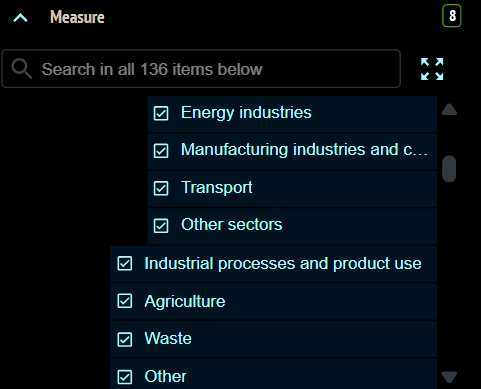

In [ ]:
df = dfs.get('df_sectors')
#fig
body = {
    "selected_TIME_PERIOD": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "selected_REF_AREA": ['CHL', 'EU28', 'AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK'],
    "selected_MEASURE": ['TR', 'IPP', 'EI', 'AGR', 'OTH', 'MIC', 'WASTE']
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["TR", "IPP", "EI", "AGR", "OTH", "MIC", "WASTE"])

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]
#pivot where index is TIME_PERIOD and columns are MEASURE
df_pivoted = df_filtered.pivot_table(index='TIME_PERIOD', columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()
# Add 'total' column for total greenhouse gas output using only available measures
df_pivoted['total'] = df_pivoted.iloc[:, 1:].sum(axis=1)

# Create a stacked bar chart using Plotly Express
# Use only the available measure columns (exclude TIME_PERIOD and total)
measure_columns = [col for col in df_pivoted.columns if col not in ['TIME_PERIOD', 'total']]

# Create a stacked bar chart using Plotly Express
fig_stacked = px.bar(df_pivoted, x='TIME_PERIOD', y=df_pivoted.columns[1:-1],  # Exclude 'total' column
                     title=f"Greenhouse gas output per year in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={'TIME_PERIOD': 'Year', 'value': 'Gas Output (in tonnes)', 'variable': 'Sector'},
                     template='plotly_dark', width=700, height=600)  

fig_stacked.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update the layout to stack the bars
fig_stacked.update_layout(barmode='relative')

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Enhanced Percentage Calculation with Negative Value Handling
# Calculate percentages for each year with negative value support
df_percentage = df_pivoted.copy()
measure_columns_for_text = df_pivoted.columns[1:-1]  # Exclude TIME_PERIOD and total

# Calculate absolute total for each row (for proper percentage calculation including negatives)
df_percentage['abs_total'] = df_pivoted[measure_columns_for_text].abs().sum(axis=1)

# Calculate percentages based on absolute values while preserving sign
for col in measure_columns_for_text:
    df_percentage[col] = (df_pivoted[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_pivoted[col])

# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)

# Update each trace individually with custom text formatting (both value and percentage)
for i, trace in enumerate(fig_stacked.data):
    if i < len(measure_columns_for_text):  # Only apply to measure traces
        # Get the column name for this trace
        col_name = measure_columns_for_text[i]
        
        # Create custom text for this trace combining formatted number and percentage
        custom_text = []
        custom_hover = []
        for j, (val, pct) in enumerate(zip(df_pivoted[col_name], df_percentage[col_name])):
            if not pd.isna(val) and val != 0 and abs(pct) > 1:  # Only show if value exists and percentage > 1%
                formatted_val = format_number(val)
                formatted_pct = f"{abs(pct):.1f}%" 
                # Use <br> instead of \n for HTML line break in Plotly
                custom_text.append(f"{formatted_val}<br>({formatted_pct})")
            else:
                custom_text.append("")
            
            # Create custom hover text for each data point
            year = df_pivoted.iloc[j]['TIME_PERIOD']
            formatted_val_hover = format_number(val) if not pd.isna(val) else "0"
            pct_hover = f"{abs(pct):.2f}%" if not pd.isna(pct) else "0%"
            custom_hover.append(
                f"<b>Year:</b> {year}<br>"
                f"<b>Sector:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val_hover} tons<br>"
                f"<b>Percentage:</b> {pct_hover}<extra></extra>"
            )
        
        # Update the trace with custom text and hover template
        fig_stacked.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,  # Reduced font size slightly to fit both lines
            textfont_color='white',
            hovertemplate=custom_hover,
            customdata=list(zip(df_pivoted[col_name], df_percentage[col_name]))
        )

# Function to calculate font size based on bar width
def calculate_font_size(text_length, bar_width_px, min_font_size=8, max_font_size=16):
    """
    Calculate font size based on text length and available bar width
    Assumes average character width is about 0.6 times the font size
    """
    # Estimated character width ratio (varies by font, but ~0.6 is reasonable for most fonts)
    char_width_ratio = 0.6
    
    # Calculate maximum font size that would fit
    max_possible_font_size = bar_width_px / (text_length * char_width_ratio)
    
    # Constrain between min and max font sizes
    font_size = max(min_font_size, min(max_possible_font_size, max_font_size))
    
    return int(font_size)

# Calculate bar width in pixels
plot_width = 700
num_bars = len(df_pivoted)
# Estimate available width for bars (accounting for margins, axes, etc.)
available_width = plot_width * 0.8  # 80% of plot width for actual bars
bar_width_px = available_width / num_bars * 0.8  # 80% of available space per bar (for gaps)

# Find the maximum text length across all bars
max_text_length = 0
formatted_texts = []

for i, row in df_pivoted.iterrows():
    formatted_text = format_number(row['total'])
    formatted_texts.append(formatted_text)
    text_length = len(formatted_text)
    max_text_length = max(max_text_length, text_length)

# Calculate font size based on the maximum text length
uniform_font_size = calculate_font_size(max_text_length, bar_width_px)

# Add total value annotations on top of each stacked bar with uniform font sizing
for i, row in df_pivoted.iterrows():
    fig_stacked.add_annotation(
        x=row['TIME_PERIOD'],
        y=row['total'],
        text=formatted_texts[i],
        showarrow=False,
        yshift=10,
        font=dict(size=uniform_font_size, color="white", family="Arial")
    )

# Add line trace for totals
fig_stacked.add_trace(go.Scatter(
    x=df_pivoted['TIME_PERIOD'],
    y=df_pivoted['total'],
    mode='lines+markers',
    name='Total',
    line=dict(color='yellow', width=3, shape='spline'),
    marker=dict(size=7, color='yellow', symbol='circle'),
    yaxis='y',
    hovertemplate='<b>Year:</b> %{x}<br><b>Total:</b> %{y:,.0f} tons<extra></extra>'
))

# Show the stacked bar chart
fig_stacked.show()


#fig
#filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]
# Create the pivot table for percentage calculations
df_pivoted_for_percentage = df_filtered.pivot_table(index='TIME_PERIOD', columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()

# Calculate percentages 
df_percentage = df_pivoted_for_percentage.copy()
measure_columns = df_percentage.columns[1:]  

# Store original values for display
df_original = df_pivoted_for_percentage.copy()

# Calculate absolute total for each row (for proper percentage calculation)
df_percentage['abs_total'] = df_percentage[measure_columns].abs().sum(axis=1)
# Calculate percentage for each segment within each bar
for col in measure_columns:
    df_percentage[col] = (df_pivoted_for_percentage[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_pivoted_for_percentage[col])
# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)
# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Create the enhanced stacked bar chart
fig_detailed = px.bar(df_percentage, 
                     x='TIME_PERIOD',
                     y=measure_columns,
                     title=f"Greenhouse gas output (in %) per year in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={
                         'TIME_PERIOD': 'Year',
                         'value': 'Percentage (%)',
                         'variable': 'Gas Type'
                     },
                     template='plotly_dark',
                     width=800, height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update layout for proper negative/positive handling
fig_detailed.update_layout(
    barmode='relative',  # This enables proper stacking with positive/negative separation
    yaxis=dict(
        ticksuffix='%',
        title='Percentage (%)',
        zeroline=True,
        zerolinewidth=3,
        zerolinecolor='white'
    )
)

# Add a prominent horizontal line at y=0 for better visual separation
fig_detailed.add_hline(y=0, line_dash="solid", line_color="white", line_width=3)
# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            year = row['TIME_PERIOD']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{percentage:.1f}%"
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            # Hover information (always show both)
            custom_hover.append(
                f"<b>Year:</b> {year}<br>"
                f"<b>Country:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )
# Hide the y-axis ticks for cleaner appearance
fig_detailed.update_yaxes(ticks="", showticklabels=False)

# Show the chart
fig_detailed.show() 


# figure: Trend greenhouse gas output per sector

# pivot the DataFrame to draw multiple lines for each MEASURE
df_pivoted = df_filtered.pivot_table(index ="TIME_PERIOD",columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()
# Create a line plot using Plotly Express
fig = px.line(df_pivoted, x='TIME_PERIOD', y=df_pivoted.columns[1:],
              title=f"Trend of greenhouse gas output per sector in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
              labels={'TIME_PERIOD': 'Year', 'value': 'Total gas output (in tonnes)', 'variable': 'Country'},
              line_shape='spline', template='plotly_dark', width=700,
              height=600)
fig.update_traces(mode='lines+markers', marker=dict(size=10), line=dict(width=3))
# Show the plot
fig.show()

#fig 2:

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                (df['REF_AREA'].isin(selected_REF_AREA)) &
                (df['MEASURE'].isin(selected_MEASURE))]

# Pivot the DataFrame to draw multiple bars for each MEASURE
df_pivoted = df_filtered.pivot_table(index='MEASURE', columns='REF_AREA', values='OBS_VALUE', aggfunc='sum').reset_index()

# Add a new column 'total' which is the sum of all gas output for each MEASURE
df_pivoted['total'] = df_pivoted.iloc[:, 1:].sum(axis=1)

# Sort index by 'total' in descending order
df_pivoted = df_pivoted.sort_values(by='total', ascending=False).reset_index(drop=True)

# Store original values for display
df_original = df_pivoted.copy()

# Create a stacked bar chart using Plotly Express   
fig_stacked = px.bar(df_pivoted, x='MEASURE', y=df_pivoted.columns[1:-1],  # Exclude 'total' column
                    title=f"Greenhouse gas output per sector in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                    labels={'MEASURE': 'Nature Source', 'value': 'Gas Output (in tonnes)', 'variable': 'Country'},
                    template='plotly_dark', width=700, height=600)

fig_stacked.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update the layout to stack the bars
fig_stacked.update_layout(barmode='relative')

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Calculate percentages for display
df_percentage_display = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'MEASURE' column and 'total' column

# Calculate absolute total for each row (for proper percentage calculation including negatives)
df_percentage_display['abs_total'] = df_pivoted[measure_columns].abs().sum(axis=1)

# Calculate percentage for each segment within each bar
for idx, row in df_pivoted.iterrows():
    abs_total_for_measure = row[measure_columns].abs().sum()
    if abs_total_for_measure != 0:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = (abs(row[col]) / abs_total_for_measure) * 100 * np.sign(row[col])
    else:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = 0

# Update each trace with both values and percentages in text and hover
for i, trace in enumerate(fig_stacked.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_pivoted.iterrows():
            measure_name = row['MEASURE']
            original_value = row[col_name]
            percentage = df_percentage_display.loc[j, col_name]
            
            if not pd.isna(original_value) and original_value != 0 and abs(percentage) > 1:  # Only show if value exists and percentage > 1%
                formatted_val = format_number(original_value)
                formatted_pct = f"{abs(percentage):.1f}%"
                # Use <br> instead of \n for HTML line break in Plotly
                custom_text.append(f"{formatted_val}<br>({formatted_pct})")
            else:
                custom_text.append("")
            
            # Hover information (always show both)
            formatted_val_hover = format_number(original_value) if not pd.isna(original_value) else "0"
            pct_hover = f"{abs(percentage):.2f}%" if not pd.isna(percentage) else "0%"
            custom_hover.append(
                f"<b>Nature Source:</b> {measure_name}<br>"
                f"<b>Country:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val_hover} tonnes<br>"
                f"<b>Percentage:</b> {pct_hover}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_stacked.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

# Function to calculate font size based on bar width
def calculate_font_size(text_length, bar_width_px, min_font_size=8, max_font_size=16):
    """
    Calculate font size based on text length and available bar width
    Assumes average character width is about 0.6 times the font size
    """
    # Estimated character width ratio (varies by font, but ~0.6 is reasonable for most fonts)
    char_width_ratio = 0.6
    
    # Calculate maximum font size that would fit and avoid division by zero
    if text_length == 0:    
        return min_font_size
    max_possible_font_size = bar_width_px / (text_length * char_width_ratio)   
    
    # Constrain between min and max font sizes
    font_size = max(min_font_size, min(max_possible_font_size, max_font_size))
    
    return int(font_size)

# Calculate bar width in pixels
plot_width = 700
num_bars = len(df_pivoted)
# Estimate available width for bars (accounting for margins, axes, etc.)
available_width = plot_width * 0.8  # 80% of plot width for actual bars
bar_width_px = available_width / num_bars * 0.8  # 80% of available space per bar (for gaps)

# Find the maximum text length across all bars
max_text_length = 0
formatted_texts = []

for i, row in df_pivoted.iterrows():
    formatted_text = format_number(row['total'])
    formatted_texts.append(formatted_text)
    text_length = len(formatted_text)
    max_text_length = max(max_text_length, text_length)

# Calculate font size based on the maximum text length
uniform_font_size = calculate_font_size(max_text_length, bar_width_px)

# Add total value annotations on top of each stacked bar with uniform font sizing
for i, row in df_pivoted.iterrows():
    fig_stacked.add_annotation(
        x=row['MEASURE'],
        y=row['total'],
        text=formatted_texts[i],
        showarrow=False,
        yshift=10,
        font=dict(size=uniform_font_size, color="white", family="Arial")
    )

# Add line trace for totals (net sum)
fig_stacked.add_trace(go.Scatter(
    x=df_pivoted['MEASURE'],
    y=df_pivoted['total'],
    mode='lines+markers',
    name='Total',
    line=dict(color='yellow', width=3, shape='linear'),
    marker=dict(size=7, color='yellow', symbol='circle'),
    yaxis='y',
    hovertemplate='<b>Nature Source:</b> %{x}<br><b>Total:</b> %{y:,.0f} tonnes<extra></extra>'
))

# Show the stacked bar chart
fig_stacked.show()


#fig 
# Percentage Stacked Bar Chart
# Calculate percentages for each country
df_percentage = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  

# Calculate total for each country and convert to percentages
for col in measure_columns:
    df_percentage[col] = (df_pivoted[col] / df_pivoted[measure_columns].sum(axis=1)) * 100

# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)

fig_detailed = px.bar(df_percentage, 
                     x='MEASURE',
                     y=measure_columns,
                     title=f"Greenhouse gas ouput (in %) per sector in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={
                         'MEASURE': 'Sector',
                         'value': 'Percentage (%)',
                         'variable': 'Sector'
                     },
                     template='plotly_dark',
                     width=800,
                     height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_detailed.update_layout(barmode='stack', yaxis=dict(range=[0, 100], ticksuffix='%'))

# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            country_name = row['MEASURE']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{percentage:.1f}%"
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            
            # Hover information (always show both)
            custom_hover.append(
                f"<b>Country:</b> {country_name}<br>"
                f"<b>Gas Type:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

fig_detailed.show()

 
# fig
df_pivoted = df_filtered.pivot_table(index='REF_AREA', columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()
# add a new column 'total' which is the sum of all gas outputs for each REF_AREA
df_pivoted['total'] = df_pivoted.iloc[:, 1:].sum(axis=1)
# sort index by 'total' in descending order
df_pivoted = df_pivoted.sort_values(by='total', ascending=False).reset_index(drop=True)

# Store original values for display
df_original = df_pivoted.copy()

# Create a stacked bar chart using Plotly Express
fig_stacked = px.bar(df_pivoted, x='REF_AREA', y=df_pivoted.columns[1:-1],  # Exclude 'total' column
                     title=f"Greenhouse gas ouput per country in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={'REF_AREA': 'Country', 'value': 'Gas output (in tons)', 'variable': 'Sector'},
                     template='plotly_dark', width=700, height=600)

fig_stacked.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update the layout to stack the bars
fig_stacked.update_layout(barmode='relative')

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Calculate percentages for display
df_percentage_display = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'REF_AREA' column and 'total' column

# Calculate percentage for each segment within each bar
for idx, row in df_pivoted.iterrows():
    total_for_country = row[measure_columns].sum()
    if total_for_country != 0:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = (row[col] / total_for_country) * 100
    else:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = 0

# Update each trace with both values and percentages in text and hover
for i, trace in enumerate(fig_stacked.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_pivoted.iterrows():
            country_name = row['REF_AREA']
            original_value = row[col_name]
            percentage = df_percentage_display.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{percentage:.1f}%"
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            
            # Hover information (always show both)
            custom_hover.append(
                f"<b>Country:</b> {country_name}<br>"
                f"<b>Sector:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_stacked.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

# Function to calculate font size based on bar width
def calculate_font_size(text_length, bar_width_px, min_font_size=8, max_font_size=16):
    """
    Calculate font size based on text length and available bar width
    Assumes average character width is about 0.6 times the font size
    """
    # Estimated character width ratio (varies by font, but ~0.6 is reasonable for most fonts)
    char_width_ratio = 0.6
    
    # Calculate maximum font size that would fit
    max_possible_font_size = bar_width_px / (text_length * char_width_ratio)
    
    # Constrain between min and max font sizes
    font_size = max(min_font_size, min(max_possible_font_size, max_font_size))
    
    return int(font_size)

# Calculate bar width in pixels
plot_width = 700
num_bars = len(df_pivoted)
# Estimate available width for bars (accounting for margins, axes, etc.)
available_width = plot_width * 0.8  # 80% of plot width for actual bars
bar_width_px = available_width / num_bars * 0.8  # 80% of available space per bar (for gaps)

# Find the maximum text length across all bars
max_text_length = 0
formatted_texts = []

for i, row in df_pivoted.iterrows():
    formatted_text = format_number(row['total'])
    formatted_texts.append(formatted_text)
    text_length = len(formatted_text)
    max_text_length = max(max_text_length, text_length)

# Calculate font size based on the maximum text length
uniform_font_size = calculate_font_size(max_text_length, bar_width_px)
 
# Add total value annotations on top of each stacked bar with uniform font sizing
for i, row in df_pivoted.iterrows():
    fig_stacked.add_annotation(
        x=row['REF_AREA'],
        y=row['total'],
        text=formatted_texts[i],
        showarrow=False,
        yshift=10,
        font=dict(size=uniform_font_size, color="white", family="Arial")
    )

# Add line trace for totals (net sum)
fig_stacked.add_trace(go.Scatter(
    x=df_pivoted['REF_AREA'],  
    y=df_pivoted['total'],
    mode='lines+markers',
    name='Total',
    line=dict(color='yellow', width=3, shape='linear'),
    marker=dict(size=7, color='yellow', symbol='circle'),
    yaxis='y',
    hovertemplate='<b>Nature Source:</b> %{x}<br><b>Total:</b> %{y:,.0f} tonnes<extra></extra>'
))  
# Show the stacked bar chart
fig_stacked.show()

# Percentage Stacked Bar Chart
# Calculate percentages for each country
df_percentage = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'REF_AREA' column and 'total' column

# Calculate total for each country and convert to percentages
for col in measure_columns:
    df_percentage[col] = (df_pivoted[col] / df_pivoted[measure_columns].sum(axis=1)) * 100

# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)

fig_detailed = px.bar(df_percentage, 
                     x='REF_AREA',
                     y=measure_columns,
                     title=f"Greenhouse gas ouput (in %) per country in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={
                         'REF_AREA': 'Country',
                         'value': 'Percentage (%)',
                         'variable': 'Sector'
                     },
                     template='plotly_dark',
                     width=800,
                     height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_detailed.update_layout(barmode='stack', yaxis=dict(range=[0, 100], ticksuffix='%'))

# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            country_name = row['REF_AREA']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{abs(percentage):.1f}%"
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            
            # Hover information (always show both)
            custom_hover.append(
                f"<b>Country:</b> {country_name}<br>"
                f"<b>Gas Type:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

fig_detailed.show()




#fig 4: Contribution of sector to the total amoumt of greenhouse gas emissions<br>in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period
body = {
    "selected_TIME_PERIOD": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "selected_REF_AREA": ['CHL', 'AUS', 'AUT', 'BEL', 'CAN'],
    "selected_MEASURE": ['TR', 'IPP', 'EI', 'AGR', 'OTH', 'MIC', 'WASTE']
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "CH4", "N2O"])
groupby_var = 'MEASURE'
columns_to_count = ['OBS_VALUE']

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]

# First group by REF_AREA to get total gas output per sector 
df_measure_totals = df_filtered.groupby(groupby_var)[columns_to_count].sum().reset_index()
#convert 'OBS_VALUE' to percentage of total gas output
total_ouput = df_measure_totals['OBS_VALUE'].sum()
df_measure_totals['OBS_VALUE'] = (df_measure_totals['OBS_VALUE'] / total_ouput) * 100
#round the OBS_VALUE to 2 decimal places
df_measure_totals['OBS_VALUE'] = df_measure_totals['OBS_VALUE'].round(2)
# Sort the DataFrame by OBS_VALUE in descending order
df_measure_totals = df_measure_totals.sort_values(by='OBS_VALUE', ascending=False)

# Create pie chart using Plotly Express
fig = px.pie(df_measure_totals, values='OBS_VALUE', names='MEASURE',
             title=f"Contribution of sector to greenhouse gas output<br>in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
             labels={'MEASURE': 'Sector', 'OBS_VALUE': 'Percentage (%)'},
             template='plotly_dark', width=700, height=600)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
# display names of the slices outside the pie chart
fig.update_traces(textposition='inside', textinfo='label+percent')
#hide the legend
fig.update_layout(showlegend=False)
#center the title
fig.update_layout(title_x=0.5)
#add note to show what is included in 'Others'
fig.add_annotation(text="'Others' includes insignificant sectors",
                   xref='paper', yref='paper', x=0.5, y=-0.1,
                   showarrow=False, font=dict(size=12, color='black'),
                     align='center')
# Show the plot
fig.show()

#Evolution of Ranking of sector's greenhouse gas output<br>from {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)}
body = {
    "selected_TIME_PERIOD": np.arange(2012, 2021).tolist(),
    "selected_REF_AREA":[
   'CRI', 'CHN', 'IND', 'IDN'],
    "selected_MEASURE": ['TR', 'IPP', 'EI', 'OTH', 'MIC', 'WASTE']
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["NH3TOT", "CO2", "NH3", "CH4", "N2O"])
groupby_var = ['MEASURE', 'TIME_PERIOD']
columns_to_count = ['OBS_VALUE']

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]
# Group the DataFrame by the specified variable and sum the OBS_VALUE
df_grouped = df_filtered.groupby(groupby_var)[columns_to_count].sum().reset_index()

# Sort by TIME_PERIOD and OBS_VALUE for proper animation
df_sorted = df_grouped.sort_values(['TIME_PERIOD', 'OBS_VALUE'], ascending=[True, True])

# Create a ascending sorted bar chart using Plotly Express
fig = px.bar(df_sorted,
             x='OBS_VALUE', y='MEASURE',
             title=f"Evolution of Ranking of sector's greenhouse gas output<br>from {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)}",
             labels={'MEASURE': 'Sector', 'OBS_VALUE': 'Total Gas Output (in tons)'},
             animation_frame='TIME_PERIOD', 
             animation_group='MEASURE',
             template='plotly_dark',
             width=800, height=600)

fig.update_traces(marker=dict(color='yellow', line=dict(width=1, color='DarkSlateGrey')))
fig.update_traces(texttemplate='%{x:.3s}', textposition='outside')
# Enforce dynamic sorting on every frame
for frame in fig.frames:
    # Get the data for this frame and sort it
    frame_data = frame.data[0]
    sorted_indices = sorted(range(len(frame_data.x)), key=lambda i: frame_data.x[i], reverse=False)
    sorted_cats = [frame_data.y[i] for i in sorted_indices]
    
    frame.layout.yaxis.update({
        'categoryorder': 'array',
        'categoryarray': sorted_cats
    })

# Show the plot
fig.show()

In [ ]:
df = dfs.get('df_nature_sources')
# figure1: Trend of total amount of greenhouse gas output per nature source
body = {
    "selected_TIME_PERIOD": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "selected_REF_AREA": ['CHL', 'EU28', 'AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'EST',
   'FIN', 'FRA', 'DEU'],
    "selected_MEASURE": ['SETT_CO2', 'CL_CH4', 'CL_CO2', 'OT_N2O', 'GL_N2O', 'GL_CO2',
       'GL_CH4', 'F_N2O']
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["SETT_CO2", "CL_CH4", "CL_CO2", "OT_N2O", "GL_N2O", "GL_CO2",
       "GL_CH4", "F_N2O"])
# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]
# pivot the DataFrame to draw multiple lines for each MEASURE
df_pivoted = df_filtered.pivot_table(index ="TIME_PERIOD",columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()
# Create a line plot using Plotly Express
fig = px.line(df_pivoted, x='TIME_PERIOD', y=df_pivoted.columns[1:],
              title=f"Trend of greenhouse gas output per nature source in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
              labels={'TIME_PERIOD': 'Year', 'value': 'Gas Output ( in tones)', 'variable': 'Nature Source'},
               line_shape='spline', template='plotly_dark', width=700,
               height=600)
# Update the traces to show both lines and markers
fig.update_traces(mode='lines+markers', marker=dict(size=10), line=dict(width=3))
# Show the plot
fig.show()

# figure2:
body = {
    "selected_TIME_PERIOD": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "selected_REF_AREA": ['CHL', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'EST', 'FIN'],    
    "selected_MEASURE": ['SETT_CO2', 'CL_CH4', 'CL_CO2', 'OT_N2O', 'GL_N2O', 'GL_CO2', 'GL_CH4', 'F_N2O']
}

selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020])
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["SETT_CO2", "CL_CH4", "CL_CO2", "OT_N2O", "GL_N2O", "GL_CO2",
       "GL_CH4", "F_N2O", "WET_N2O", "HWP_CO2", "F_CH4", "F_CO2",
       "SETT_N2O", "SETT_CH4", "CL_N2O", "WET_CH4", "OTHER_CO2",
       "OTHER_N2O", "OT_CO2", "OTHER_CH4", "OT_CH4", "WET_CO2"])

# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                (df['REF_AREA'].isin(selected_REF_AREA)) &
                (df['MEASURE'].isin(selected_MEASURE))]

# Pivot the DataFrame to draw multiple bars for each MEASURE
df_pivoted = df_filtered.pivot_table(index='MEASURE', columns='REF_AREA', values='OBS_VALUE', aggfunc='sum').reset_index()

# Add a new column 'total' which is the sum of all gas output for each MEASURE
df_pivoted['total'] = df_pivoted.iloc[:, 1:].sum(axis=1)

# Sort index by 'total' in descending order
df_pivoted = df_pivoted.sort_values(by='total', ascending=False).reset_index(drop=True)

# Store original values for display
df_original = df_pivoted.copy()

# Create a stacked bar chart using Plotly Express   
fig_stacked = px.bar(df_pivoted, x='MEASURE', y=df_pivoted.columns[1:-1],  # Exclude 'total' column
                    title=f"Greenhouse gas output per nature source in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                    labels={'MEASURE': 'Nature Source', 'value': 'Gas Output (in tonnes)', 'variable': 'Country'},
                    template='plotly_dark', width=700, height=600)

fig_stacked.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update the layout to stack the bars
fig_stacked.update_layout(barmode='relative')

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Calculate percentages for display
df_percentage_display = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'MEASURE' column and 'total' column

# Calculate absolute total for each row (for proper percentage calculation including negatives)
df_percentage_display['abs_total'] = df_pivoted[measure_columns].abs().sum(axis=1)

# Calculate percentage for each segment within each bar
for idx, row in df_pivoted.iterrows():
    abs_total_for_measure = row[measure_columns].abs().sum()
    if abs_total_for_measure != 0:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = (abs(row[col]) / abs_total_for_measure) * 100 * np.sign(row[col])
    else:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = 0

# Update each trace with both values and percentages in text and hover
for i, trace in enumerate(fig_stacked.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_pivoted.iterrows():
            measure_name = row['MEASURE']
            original_value = row[col_name]
            percentage = df_percentage_display.loc[j, col_name]
            
            if not pd.isna(original_value) and original_value != 0 and abs(percentage) > 1:  # Only show if value exists and percentage > 1%
                formatted_val = format_number(original_value)
                formatted_pct = f"{abs(percentage):.1f}%"
                # Use <br> instead of \n for HTML line break in Plotly
                custom_text.append(f"{formatted_val}<br>({formatted_pct})")
            else:
                custom_text.append("")
            
            # Hover information (always show both)
            formatted_val_hover = format_number(original_value) if not pd.isna(original_value) else "0"
            pct_hover = f"{abs(percentage):.2f}%" if not pd.isna(percentage) else "0%"
            custom_hover.append(
                f"<b>Nature Source:</b> {measure_name}<br>"
                f"<b>Country:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val_hover} tonnes<br>"
                f"<b>Percentage:</b> {pct_hover}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_stacked.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

# Function to calculate font size based on bar width
def calculate_font_size(text_length, bar_width_px, min_font_size=8, max_font_size=16):
    """
    Calculate font size based on text length and available bar width
    Assumes average character width is about 0.6 times the font size
    """
    # Estimated character width ratio (varies by font, but ~0.6 is reasonable for most fonts)
    char_width_ratio = 0.6
    
    # Calculate maximum font size that would fit
    max_possible_font_size = bar_width_px / (text_length * char_width_ratio)
    
    # Constrain between min and max font sizes
    font_size = max(min_font_size, min(max_possible_font_size, max_font_size))
    
    return int(font_size)

# Calculate bar width in pixels
plot_width = 700
num_bars = len(df_pivoted)
# Estimate available width for bars (accounting for margins, axes, etc.)
available_width = plot_width * 0.8  # 80% of plot width for actual bars
bar_width_px = available_width / num_bars * 0.8  # 80% of available space per bar (for gaps)

# Find the maximum text length across all bars
max_text_length = 0
formatted_texts = []

for i, row in df_pivoted.iterrows():
    formatted_text = format_number(row['total'])
    formatted_texts.append(formatted_text)
    text_length = len(formatted_text)
    max_text_length = max(max_text_length, text_length)

# Calculate font size based on the maximum text length
uniform_font_size = calculate_font_size(max_text_length, bar_width_px)

# Add total value annotations on top of each stacked bar with uniform font sizing
for i, row in df_pivoted.iterrows():
    fig_stacked.add_annotation(
        x=row['MEASURE'],
        y=row['total'],
        text=formatted_texts[i],
        showarrow=False,
        yshift=10,
        font=dict(size=uniform_font_size, color="white", family="Arial")
    )

# Add line trace for totals (net sum)
fig_stacked.add_trace(go.Scatter(
    x=df_pivoted['MEASURE'],
    y=df_pivoted['total'],
    mode='lines+markers',
    name='Total',
    line=dict(color='yellow', width=3, shape='linear'),
    marker=dict(size=7, color='yellow', symbol='circle'),
    yaxis='y',
    hovertemplate='<b>Nature Source:</b> %{x}<br><b>Total:</b> %{y:,.0f} tonnes<extra></extra>'
))

# Show the stacked bar chart
fig_stacked.show()











#filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]
# Create the pivot table for percentage calculations
df_pivoted_for_percentage = df_filtered.pivot_table(index='MEASURE',
                                                   columns='REF_AREA',
                                                   values='OBS_VALUE',
                                                   aggfunc='sum').reset_index()
#sort the pivot table by the total greenhouse gas output in descending order
df_pivoted_for_percentage['total'] = df_pivoted_for_percentage.iloc[:, 1:].sum(axis=1)
df_pivoted_for_percentage = df_pivoted_for_percentage.sort_values(by='total', ascending=False).reset_index(drop=True)

# Calculate percentages 
df_percentage = df_pivoted_for_percentage.copy()
measure_columns = df_percentage.columns[1:]  

# Store original values for display
df_original = df_pivoted_for_percentage.copy()

# Calculate absolute total for each row (for proper percentage calculation)
df_percentage['abs_total'] = df_percentage[measure_columns].abs().sum(axis=1)
# Calculate percentage for each segment within each bar
for col in measure_columns:
    df_percentage[col] = (df_pivoted_for_percentage[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_pivoted_for_percentage[col])
# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)
# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Create the enhanced stacked bar chart
fig_detailed = px.bar(df_percentage, 
                     x='MEASURE',
                     y=measure_columns,
                     title=f"Greenhouse gas output (in %) per nature source in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={
                         'TIME_PERIOD': 'Year',
                         'value': 'Percentage (%)',
                         'variable': 'Country'
                     },
                     template='plotly_dark',
                     width=800, height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update layout for proper negative/positive handling
fig_detailed.update_layout(
    barmode='relative',  # This enables proper stacking with positive/negative separation
    yaxis=dict(
        ticksuffix='%',
        title='Percentage (%)',
        zeroline=True,
        zerolinewidth=3,
        zerolinecolor='white'
    )
)

# Add a prominent horizontal line at y=0 for better visual separation
fig_detailed.add_hline(y=0, line_dash="solid", line_color="white", line_width=3)
# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            year = row['MEASURE']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{abs(percentage):.1f}%" 
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            # Hover information (always show both)
            custom_hover.append(
                f"<b>Year:</b> {year}<br>"
                f"<b> Nature Source:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )
# Hide the y-axis ticks for cleaner appearance
fig_detailed.update_yaxes(ticks="", showticklabels=False)

# Show the chart
fig_detailed.show() 










# figure: EVolution of Ranking of nature source's the total amoumt of greenhouse gas output<br>from {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)}
body = {
      "selected_TIME_PERIOD": np.arange(2012, 2021).tolist(),
      "selected_REF_AREA":[
      'CRI', 'CHN', 'IND', 'IDN', 'PHL', 'ZAF', 'VNM', 'JPN', 'NZL',
      'COL', 'ARG'],
      "selected_MEASURE": ['SETT_CO2', 'CL_CH4', 'CL_CO2', 'OT_N2O', 'GL_N2O', 'GL_CO2',
         'GL_CH4', 'F_N2O', 'WET_N2O', 'HWP_CO2', 'F_CH4',
         'SETT_N2O', 'SETT_CH4', "CL_N2O", "WET_CH4", "OTHER_CO2",
         "OTHER_N2O", "OT_CO2", "OTHER_CH4", "OT_CH4", "WET_CO2"]
   }
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020]) 
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["SETT_CO2", "CL_CH4", "CL_CO2", "OT_N2O", "GL_N2O", "GL_CO2",
       "GL_CH4", "F_N2O", "WET_N2O", "HWP_CO2", "F_CH4", "F_CO2",
       "SETT_N2O", "SETT_CH4", "CL_N2O", "WET_CH4", "OTHER_CO2",
       "OTHER_N2O", "OT_CO2", "OTHER_CH4", "OT_CH4", "WET_CO2"])
groupby_var = ['MEASURE', 'TIME_PERIOD']
columns_to_count = ['OBS_VALUE']
# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]
# Group the DataFrame by the specified variable and sum the OBS_VALUE
df_grouped = df_filtered.groupby(groupby_var)[columns_to_count].sum().reset_index()
# Sort by TIME_PERIOD and OBS_VALUE for proper animation
df_sorted = df_grouped.sort_values(['TIME_PERIOD', 'OBS_VALUE'], ascending=[True, True])
# Create a ascending sorted bar chart using Plotly Express
fig = px.bar(df_sorted,
             x='OBS_VALUE', y='MEASURE',
               title=f"Evolution of Ranking of nature source's greenhouse gas output<br>from {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)}",
               labels={'MEASURE': 'Nature Source', 'OBS_VALUE': 'Gas Output (in tones)'}, 
               animation_frame='TIME_PERIOD',
               animation_group='MEASURE',
               template='plotly_dark',
               width=800, height=600)
fig.update_traces(marker=dict(color='yellow', line=dict(width=1, color='DarkSlateGrey')))
fig.update_traces(texttemplate='%{x:.2s}', textposition='outside')

# Enforce dynamic sorting on every frame
for frame in fig.frames:
    # Get the data for this frame and sort it
    frame_data = frame.data[0]
    sorted_indices = sorted(range(len(frame_data.x)), key=lambda i: frame_data.x[i], reverse=False)
    sorted_cats = [frame_data.y[i] for i in sorted_indices]
    
    frame.layout.yaxis.update({
        'categoryorder': 'array',
        'categoryarray': sorted_cats
    })
# Show the plot
fig.show()



# figure4: stacked bar chart from pivot table
#pivot where index is TIME_PERIOD and columns are MEASURE
df_pivoted = df_filtered.pivot_table(index='TIME_PERIOD', columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()
# Add 'total' column for total greenhouse gas output using only available measures
df_pivoted['total'] = df_pivoted.iloc[:, 1:].sum(axis=1)

# Create a stacked bar chart using Plotly Express
# Use only the available measure columns (exclude TIME_PERIOD and total)
measure_columns = [col for col in df_pivoted.columns if col not in ['TIME_PERIOD', 'total']]

# Create a stacked bar chart using Plotly Express
fig_stacked = px.bar(df_pivoted, x='TIME_PERIOD', y=df_pivoted.columns[1:-1],  # Exclude 'total' column
                     title=f"Greenhouse gas output per year in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={'TIME_PERIOD': 'Year', 'value': 'Gas Output (in tonnes)', 'variable': 'Nature Source'},
                     template='plotly_dark', width=700, height=600)  

fig_stacked.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update the layout to stack the bars
fig_stacked.update_layout(barmode='relative')

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Enhanced Percentage Calculation with Negative Value Handling
# Calculate percentages for each year with negative value support
df_percentage = df_pivoted.copy()
measure_columns_for_text = df_pivoted.columns[1:-1]  # Exclude TIME_PERIOD and total

# Calculate absolute total for each row (for proper percentage calculation including negatives)
df_percentage['abs_total'] = df_pivoted[measure_columns_for_text].abs().sum(axis=1)

# Calculate percentages based on absolute values while preserving sign
for col in measure_columns_for_text:
    df_percentage[col] = (df_pivoted[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_pivoted[col])

# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)

# Update each trace individually with custom text formatting (both value and percentage)
for i, trace in enumerate(fig_stacked.data):
    if i < len(measure_columns_for_text):  # Only apply to measure traces
        # Get the column name for this trace
        col_name = measure_columns_for_text[i]
        
        # Create custom text for this trace combining formatted number and percentage
        custom_text = []
        custom_hover = []
        for j, (val, pct) in enumerate(zip(df_pivoted[col_name], df_percentage[col_name])):
            if not pd.isna(val) and val != 0 and abs(pct) > 1:  # Only show if value exists and percentage > 1%
                formatted_val = format_number(val)
                formatted_pct = f"{abs(pct):.1f}%" 
                # Use <br> instead of \n for HTML line break in Plotly
                custom_text.append(f"{formatted_val}<br>({formatted_pct})")
            else:
                custom_text.append("")
            
            # Create custom hover text for each data point
            year = df_pivoted.iloc[j]['TIME_PERIOD']
            formatted_val_hover = format_number(val) if not pd.isna(val) else "0"
            pct_hover = f"{abs(pct):.2f}%" if not pd.isna(pct) else "0%"
            custom_hover.append(
                f"<b>Year:</b> {year}<br>"
                f"<b>Gas Type:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val_hover} tons<br>"
                f"<b>Percentage:</b> {pct_hover}<extra></extra>"
            )
        
        # Update the trace with custom text and hover template
        fig_stacked.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,  # Reduced font size slightly to fit both lines
            textfont_color='white',
            hovertemplate=custom_hover,
            customdata=list(zip(df_pivoted[col_name], df_percentage[col_name]))
        )

# Function to calculate font size based on bar width
def calculate_font_size(text_length, bar_width_px, min_font_size=8, max_font_size=16):
    """
    Calculate font size based on text length and available bar width
    Assumes average character width is about 0.6 times the font size
    """
    # Estimated character width ratio (varies by font, but ~0.6 is reasonable for most fonts)
    char_width_ratio = 0.6
    
    # Calculate maximum font size that would fit
    max_possible_font_size = bar_width_px / (text_length * char_width_ratio)
    
    # Constrain between min and max font sizes
    font_size = max(min_font_size, min(max_possible_font_size, max_font_size))
    
    return int(font_size)

# Calculate bar width in pixels
plot_width = 700
num_bars = len(df_pivoted)
# Estimate available width for bars (accounting for margins, axes, etc.)
available_width = plot_width * 0.8  # 80% of plot width for actual bars
bar_width_px = available_width / num_bars * 0.8  # 80% of available space per bar (for gaps)

# Find the maximum text length across all bars
max_text_length = 0
formatted_texts = []

for i, row in df_pivoted.iterrows():
    formatted_text = format_number(row['total'])
    formatted_texts.append(formatted_text)
    text_length = len(formatted_text)
    max_text_length = max(max_text_length, text_length)

# Calculate font size based on the maximum text length
uniform_font_size = calculate_font_size(max_text_length, bar_width_px)

# Add total value annotations on top of each stacked bar with uniform font sizing
for i, row in df_pivoted.iterrows():
    fig_stacked.add_annotation(
        x=row['TIME_PERIOD'],
        y=row['total'],
        text=formatted_texts[i],
        showarrow=False,
        yshift=10,
        font=dict(size=uniform_font_size, color="white", family="Arial")
    )


# Add line trace for totals (net sum)
fig_stacked.add_trace(go.Scatter(
    x=df_pivoted['TIME_PERIOD'],
    y=df_pivoted['total'],
    mode='lines+markers',
    name='Total',
    line=dict(color='yellow', width=3, shape='linear'),
    marker=dict(size=7, color='yellow', symbol='circle'),
    yaxis='y',
    hovertemplate='<b>Year:</b> %{x}<br><b>Total:</b> %{y:,.0f} tonnes<extra></extra>'
))
# Show the stacked bar chart
fig_stacked.show()


#filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) &
                 (df['REF_AREA'].isin(selected_REF_AREA)) &
                    (df['MEASURE'].isin(selected_MEASURE))]
# Create the pivot table for percentage calculations
df_pivoted_for_percentage = df_filtered.pivot_table(index='TIME_PERIOD', columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()

# Calculate percentages 
df_percentage = df_pivoted_for_percentage.copy()
measure_columns = df_percentage.columns[1:]  

# Store original values for display
df_original = df_pivoted_for_percentage.copy()

# Calculate absolute total for each row (for proper percentage calculation)
df_percentage['abs_total'] = df_percentage[measure_columns].abs().sum(axis=1)
# Calculate percentage for each segment within each bar
for col in measure_columns:
    df_percentage[col] = (df_pivoted_for_percentage[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_pivoted_for_percentage[col])
# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)
# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Create the enhanced stacked bar chart
fig_detailed = px.bar(df_percentage, 
                     x='TIME_PERIOD',
                     y=measure_columns,
                     title=f"Greenhouse gas output (in %) per year in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={
                         'TIME_PERIOD': 'Year',
                         'value': 'Percentage (%)',
                         'variable': 'Nature Source'
                     },
                     template='plotly_dark',
                     width=800, height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update layout for proper negative/positive handling
fig_detailed.update_layout(
    barmode='relative',  # This enables proper stacking with positive/negative separation
    yaxis=dict(
        ticksuffix='%',
        title='Percentage (%)',
        zeroline=True,
        zerolinewidth=3,
        zerolinecolor='white'
    )
)

# Add a prominent horizontal line at y=0 for better visual separation
fig_detailed.add_hline(y=0, line_dash="solid", line_color="white", line_width=3)
# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            year = row['TIME_PERIOD']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{abs(percentage):.1f}%"  
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            # Hover information (always show both)
            custom_hover.append(
                f"<b>Year:</b> {year}<br>"
                f"<b>Country:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )
# Hide the y-axis ticks for cleaner appearance
fig_detailed.update_yaxes(ticks="", showticklabels=False)

# Show the chart
fig_detailed.show() 



In [ ]:

# Split the DataFrame into two parts by '_', the part before '_' is the MEASURE and the part after '_' is the GAS_TYPE
df = df.copy()
df[['MEASURE', 'GAS_TYPE']] = df['MEASURE'].str.split('_', expand=True)

# Enhanced Percentage Stacked Bar Chart with Negative Value Handling
# Create the pivot table for percentage calculations
df_pivoted_for_percentage = df.pivot_table(index='MEASURE', columns='GAS_TYPE', values='OBS_VALUE', aggfunc='sum').reset_index()

# Calculate percentages 
df_percentage = df_pivoted_for_percentage.copy()
measure_columns = df_percentage.columns[1:]  # Exclude 'MEASURE' column

# Store original values for display
df_original = df_pivoted_for_percentage.copy()

# Calculate absolute total for each row (for proper percentage calculation)
df_percentage['abs_total'] = df_percentage[measure_columns].abs().sum(axis=1)

# Calculate percentages based on absolute values while preserving sign
for col in measure_columns:
    df_percentage[col] = (df_percentage[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_percentage[col])

# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)

# Update measure_columns to exclude the new 'abs_total' column
measure_columns = [col for col in df_percentage.columns if col not in ['MEASURE', 'abs_total']]

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Create the enhanced stacked bar chart
fig_detailed = px.bar(df_percentage, 
                     x='MEASURE',
                     y=measure_columns,
                     title="Percentage of greenhouse gas output per nature source",
                     labels={
                         'MEASURE': 'Nature Source',
                         'value': 'Percentage (%)',
                         'variable': 'Gas Type'
                     },
                     template='plotly_dark',
                     width=800, height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update layout for proper negative/positive handling
fig_detailed.update_layout(
    barmode='relative',  # This enables proper stacking with positive/negative separation
    yaxis=dict(
        ticksuffix='%',
        title='Percentage (%)',
        zeroline=True,
        zerolinewidth=3,
        zerolinecolor='white'
    )
)

# Add a prominent horizontal line at y=0 for better visual separation
fig_detailed.add_hline(y=0, line_dash="solid", line_color="white", line_width=3)
# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            measure_name = row['MEASURE']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            # Only show text if value exists and percentage is significant
            if not pd.isna(original_value) and original_value != 0 and abs(percentage) > 1:
                formatted_val = format_number(original_value)
                formatted_pct = f"{abs(percentage):.1f}%"
                # Use <br> instead of \n for HTML line break in Plotly
                custom_text.append(f"{formatted_val}<br>({formatted_pct})")
            else:
                custom_text.append("")
            
            # Hover information (always show both value and percentage)
            formatted_val_hover = format_number(original_value) if not pd.isna(original_value) else "0"
            pct_hover = f"{abs(percentage):.2f}%" if not pd.isna(percentage) else "0%"
            custom_hover.append(
                f"<b>Nature Source:</b> {measure_name}<br>"
                f"<b>Gas Type:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val_hover} tonnes<br>"
                f"<b>Percentage:</b> {pct_hover}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

# Hide the y-axis ticks for cleaner appearance
fig_detailed.update_yaxes(ticks="", showticklabels=False)

# Show the chart
fig_detailed.show() 

# Enhanced Percentage Stacked Bar Chart with Negative Value Handling AND Numerical Values (Second Chart)
# First, clean the data before pivoting
df_clean = df.copy()

# Remove rows where GAS_TYPE is None or empty
df_clean = df_clean.dropna(subset=['GAS_TYPE'])
df_clean = df_clean[df_clean['GAS_TYPE'] != '']

# Create the pivot table for percentage calculations
df_pivoted_for_percentage = df_clean.pivot_table(index='GAS_TYPE', columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()

# Calculate percentages 
df_percentage = df_pivoted_for_percentage.copy()
measure_columns = df_percentage.columns[1:]  # Exclude 'GAS_TYPE' column

# Store original values for display
df_original = df_pivoted_for_percentage.copy()

# Ensure all data is numeric before calculations
df_percentage[measure_columns] = df_percentage[measure_columns].apply(pd.to_numeric, errors='coerce')
# Calculate absolute total for each row (for proper percentage calculation)
df_percentage['abs_total'] = df_percentage[measure_columns].abs().sum(axis=1)
# Calculate percentages based on absolute values while preserving sign
for col in measure_columns:
    df_percentage[col] = (df_percentage[col].abs() / df_percentage['abs_total']) * 100 * np.sign(df_percentage[col])
# Fill NaN values with 0
df_percentage = df_percentage.fillna(0)
# Update measure_columns to exclude the new 'abs_total' column
measure_columns = [col for col in df_percentage.columns if col not in ['GAS_TYPE', 'abs_total']]
# Create the enhanced stacked bar chart
fig_detailed = px.bar(df_percentage, 
                     x='GAS_TYPE',
                     y=measure_columns,
                     title="Percentage of greenhouse gas output per gas type",
                     labels={
                         'GAS_TYPE': 'Gas Type',
                         'value': 'Percentage (%)',
                         'variable': 'Nature Source'
                     },
                     template='plotly_dark',
                     width=800, height=600)
fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
# Update layout for proper negative/positive handling
fig_detailed.update_layout(
    barmode='relative',  # This enables proper stacking with positive/negative separation
    yaxis=dict(
        ticksuffix='%',
        title='Percentage (%)',
        zeroline=True,
        zerolinewidth=3,
        zerolinecolor='white'
    )
)
# Add a prominent horizontal line at y=0 for better visual separation
fig_detailed.add_hline(y=0, line_dash="solid", line_color="white", line_width=3)
# Update each trace with both values and percentages in text and hover for percentage chart 
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            gas_type_name = row['GAS_TYPE']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            # Only show text if value exists and percentage is significant
            if not pd.isna(original_value) and original_value != 0 and abs(percentage) > 1:
                formatted_val = format_number(original_value)
                formatted_pct = f"{abs(percentage):.1f}%"
                # Use <br> instead of \n for HTML line break in Plotly
                custom_text.append(f"{formatted_val}<br>({formatted_pct})")
            else:
                custom_text.append("")
            
            # Hover information (always show both value and percentage)
            formatted_val_hover = format_number(original_value) if not pd.isna(original_value) else "0"
            pct_hover = f"{abs(percentage):.2f}%" if not pd.isna(percentage) else "0%"
            custom_hover.append(
                f"<b>Gas Type:</b> {gas_type_name}<br>"
                f"<b>Nature Source:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val_hover} tonnes<br>"
                f"<b>Percentage:</b> {pct_hover}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

# Hide the y-axis ticks for cleaner appearance
fig_detailed.update_yaxes(ticks="", showticklabels=False)

# Show the chart
fig_detailed.show()

In [ ]:
df = dfs.get("df_nature_sources")
body = {    "selected_TIME_PERIOD": np.arange(2012, 2021).tolist(),
    "selected_REF_AREA": [
        'CRI', 'CHN', 'IND', 'IDN', 'PHL', 'ZAF', 'VNM', 'JPN', 'NZL',
        'COL', 'ARG'
    ],
    "selected_MEASURE": [ 'SETT_CO2', 'CL_CH4', 'CL_CO2', 'OT_N2O', 'GL_N2O', 'GL_CO2',
    ]
}
selected_TIME_PERIOD = body.get("selected_TIME_PERIOD", [2016, 2017, 2018, 2019, 2020]) 
selected_REF_AREA = body.get("selected_REF_AREA", ["USA", "VNM"])
selected_MEASURE = body.get("selected_MEASURE", ["SETT_CO2", "CL_CH4", "CL_CO2", "OT_N2O", "GL_N2O", "GL_CO2"])
# Filter the DataFrame for the selected TIME_PERIOD, REF_AREA, and MEASURE
df_filtered = df[(df['TIME_PERIOD'].isin(selected_TIME_PERIOD)) & df['REF_AREA'].isin(selected_REF_AREA) & df['MEASURE'].isin(selected_MEASURE)]
df_pivoted = df_filtered.pivot_table(index='REF_AREA', columns='MEASURE', values='OBS_VALUE', aggfunc='sum').reset_index()
# add a new column 'total' which is the sum of all gas outputs for each REF_AREA
df_pivoted['total'] = df_pivoted.iloc[:, 1:].sum(axis=1)
# sort index by 'total' in descending order
df_pivoted = df_pivoted.sort_values(by='total', ascending=False).reset_index(drop=True)

# Store original values for display
df_original = df_pivoted.copy()

# Create a stacked bar chart using Plotly Express
fig_stacked = px.bar(df_pivoted, x='REF_AREA', y=df_pivoted.columns[1:-1],  # Exclude 'total' column
                     title=f"Greenhouse gas ouput per country in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={'REF_AREA': 'Country', 'value': 'Gas output (in tons)', 'variable': 'Nature Source'},
                     template='plotly_dark', width=700, height=600)

fig_stacked.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Update the layout to stack the bars
fig_stacked.update_layout(barmode='relative')

# Function to format large numbers
def format_number(value):
    if pd.isna(value) or value == 0:
        return "0"
    elif abs(value) >= 1e9:
        return f"{value/1e9:.1f}B"
    elif abs(value) >= 1e6:
        return f"{value/1e6:.1f}M"
    elif abs(value) >= 1e3:
        return f"{value/1e3:.1f}k"
    else:
        return f"{value:.0f}"

# Calculate percentages for display
df_percentage_display = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'REF_AREA' column and 'total' column

# Calculate percentage for each segment within each bar
for idx, row in df_pivoted.iterrows():
    total_for_country = row[measure_columns].sum()
    if total_for_country != 0:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = (row[col] / total_for_country) * 100
    else:
        for col in measure_columns:
            df_percentage_display.loc[idx, col] = 0

# Update each trace with both values and percentages in text and hover
for i, trace in enumerate(fig_stacked.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_pivoted.iterrows():
            country_name = row['REF_AREA']
            original_value = row[col_name]
            percentage = df_percentage_display.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{percentage:.1f}%"
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            
            # Hover information (always show both)
            custom_hover.append(
                f"<b>Country:</b> {country_name}<br>"
                f"<b>Sector:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_stacked.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

# Function to calculate font size based on bar width
def calculate_font_size(text_length, bar_width_px, min_font_size=8, max_font_size=16):
    """
    Calculate font size based on text length and available bar width
    Assumes average character width is about 0.6 times the font size
    """
    # Estimated character width ratio (varies by font, but ~0.6 is reasonable for most fonts)
    char_width_ratio = 0.6
    
    # Calculate maximum font size that would fit
    max_possible_font_size = bar_width_px / (text_length * char_width_ratio)
    
    # Constrain between min and max font sizes
    font_size = max(min_font_size, min(max_possible_font_size, max_font_size))
    
    return int(font_size)

# Calculate bar width in pixels
plot_width = 700
num_bars = len(df_pivoted)
# Estimate available width for bars (accounting for margins, axes, etc.)
available_width = plot_width * 0.8  # 80% of plot width for actual bars
bar_width_px = available_width / num_bars * 0.8  # 80% of available space per bar (for gaps)

# Find the maximum text length across all bars
max_text_length = 0
formatted_texts = []

for i, row in df_pivoted.iterrows():
    formatted_text = format_number(row['total'])
    formatted_texts.append(formatted_text)
    text_length = len(formatted_text)
    max_text_length = max(max_text_length, text_length)

# Calculate font size based on the maximum text length
uniform_font_size = calculate_font_size(max_text_length, bar_width_px)
 
# Add total value annotations on top of each stacked bar with uniform font sizing
for i, row in df_pivoted.iterrows():
    fig_stacked.add_annotation(
        x=row['REF_AREA'],
        y=row['total'],
        text=formatted_texts[i],
        showarrow=False,
        yshift=10,
        font=dict(size=uniform_font_size, color="white", family="Arial")
    )

# Add line trace for totals (net sum)
fig_stacked.add_trace(go.Scatter(
    x=df_pivoted['REF_AREA'],  
    y=df_pivoted['total'],
    mode='lines+markers',
    name='Total',
    line=dict(color='yellow', width=3, shape='linear'),
    marker=dict(size=7, color='yellow', symbol='circle'),
    yaxis='y',
    hovertemplate='<b>Nature Source:</b> %{x}<br><b>Total:</b> %{y:,.0f} tonnes<extra></extra>'
))  
# Show the stacked bar chart
fig_stacked.show()

# Percentage Stacked Bar Chart
# Calculate percentages for each country
df_percentage = df_pivoted.copy()
measure_columns = df_pivoted.columns[1:-1]  # Exclude 'REF_AREA' column and 'total' column

# Calculate total for each country and convert to percentages
for col in measure_columns:
    total_per_country = df_pivoted[measure_columns].sum(axis=1)
    # Avoid division by zero by using np.where
    df_percentage[col] = np.where(
        total_per_country != 0,
        (df_pivoted[col] / total_per_country) * 100,
        0
    )

# Fill NaN values with 0 (in case there are any remaining)
df_percentage = df_percentage.fillna(0)

fig_detailed = px.bar(df_percentage, 
                     x='REF_AREA',
                     y=measure_columns,
                     title=f"Greenhouse gas ouput (in %) per country in the {min(selected_TIME_PERIOD)}-{max(selected_TIME_PERIOD)} period",
                     labels={
                         'REF_AREA': 'Country',
                         'value': 'Percentage (%)',
                         'variable': 'Nature Source'
                     },
                     template='plotly_dark',
                     width=800,
                     height=600)

fig_detailed.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_detailed.update_layout(barmode='stack', yaxis=dict(range=[0, 100], ticksuffix='%'))

# Update each trace with both values and percentages in text and hover for percentage chart
for i, trace in enumerate(fig_detailed.data):
    if i < len(measure_columns):
        col_name = measure_columns[i]
        
        # Create custom text and hover for each data point
        custom_text = []
        custom_hover = []
        
        for j, row in df_percentage.iterrows():
            country_name = row['REF_AREA']
            percentage = row[col_name]
            original_value = df_original.loc[j, col_name]
            
            formatted_val = format_number(original_value)
            pct_display = f"{abs(percentage):.1f}%"
            custom_text.append(f"{formatted_val}<br>({pct_display})")

            
            # Hover information (always show both)
            custom_hover.append(
                f"<b>Country:</b> {country_name}<br>"
                f"<b>Gas Type:</b> {col_name}<br>"
                f"<b>Value:</b> {formatted_val} tons<br>"
                f"<b>Percentage:</b> {pct_display}<extra></extra>"
            )
        
        # Update the trace with custom text and hover
        fig_detailed.data[i].update(
            text=custom_text,
            textposition='inside',
            textfont_size=8,
            textfont_color='white',
            hovertemplate=custom_hover
        )

fig_detailed.show()

: 